In [ ]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 2. Load the Dataset
df = pd.read_csv("/content/loan_data_set.csv")

# Display first 5 rows
# df.head()
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")
df.head()

Rows: 614, Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# 3. Data Preprocessing

# Check for missing values
print(df.isnull().sum())

# Fill missing values
# Check if mode is not empty before filling
if df['Gender'].mode().empty:
    df['Gender'].fillna(df['Gender'].mode().iloc[0] if not df['Gender'].mode().empty else 'Unknown', inplace=True) # Use .iloc[0] and handle empty mode
else:
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

df['Dependents'] = pd.to_numeric(df['Dependents'].astype(str).str.replace('+', ''), errors='coerce')
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


# Check if 'Loan_ID' column exists before dropping
if 'Loan_ID' in df.columns:
    # Drop 'Loan_ID' column (not relevant)
    df.drop('Loan_ID', axis=1, inplace=True)
else:
    print("Loan_ID column not found in the DataFrame.")

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Convert target variable: Y -> 1, N -> 0
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


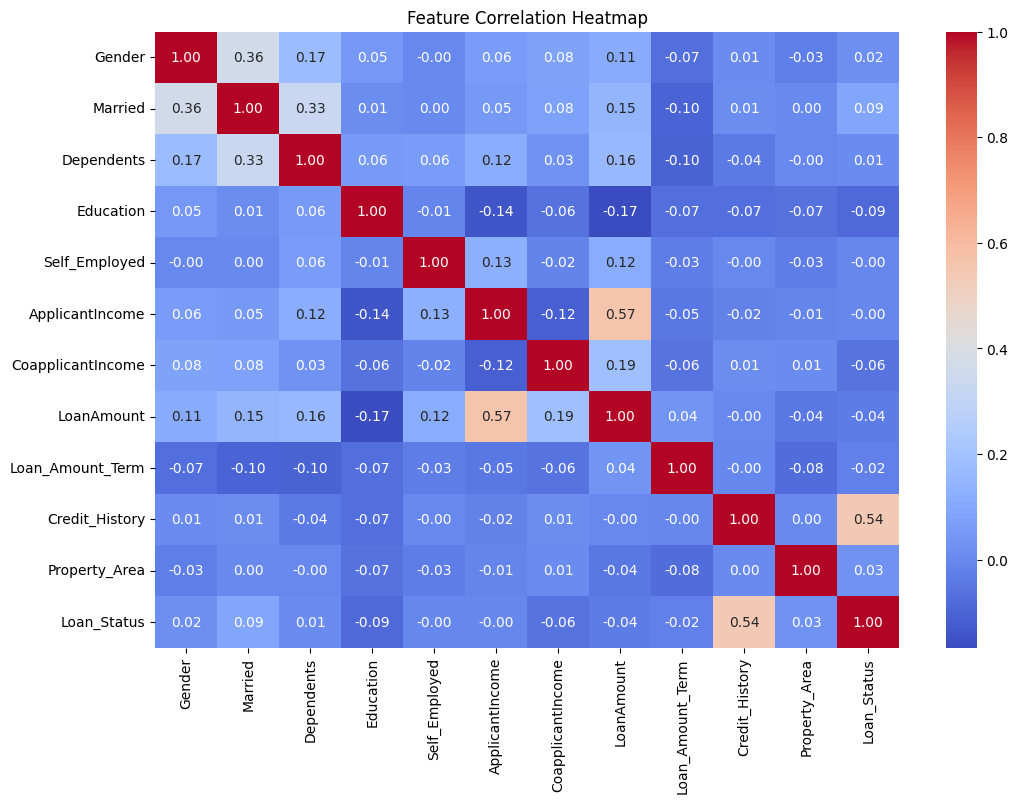

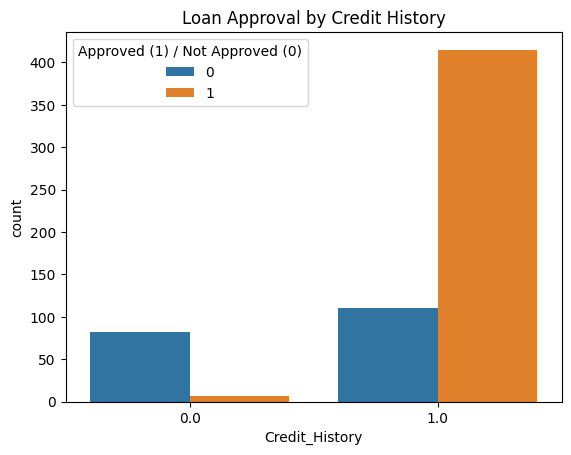

In [ ]:
# 4. Exploratory Data Analysis (EDA)
df['Dependents'] = df['Dependents'].astype(str).str.replace('+', '').astype(float)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Countplot - Loan approval by Credit History
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Loan Approval by Credit History")
plt.legend(title='Approved (1) / Not Approved (0)')
plt.show()

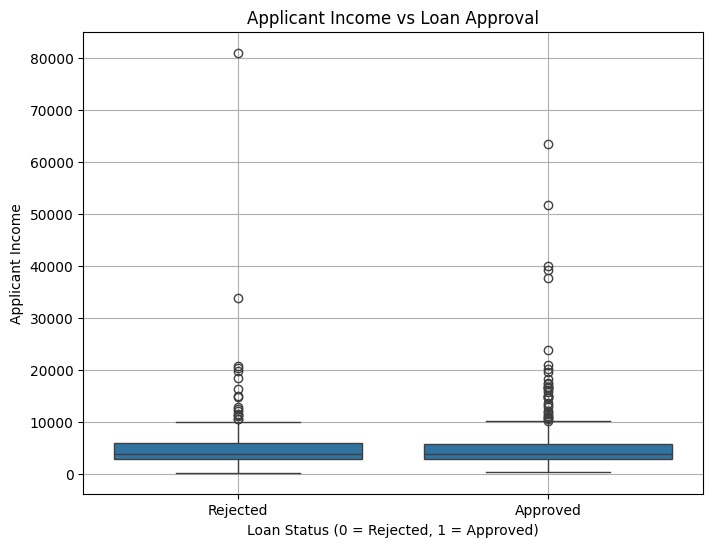

In [ ]:
# Boxplot: Applicant Income vs Loan Approval
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income vs Loan Approval')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Applicant Income')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.grid(True)
plt.show()

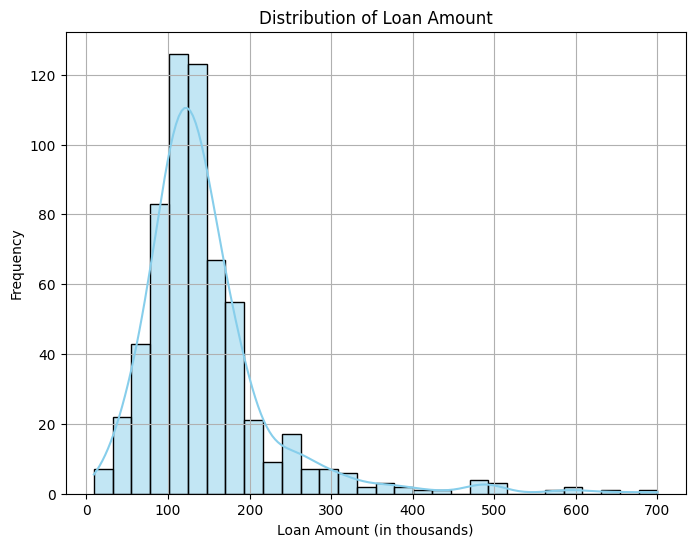

In [ ]:
# Distribution Plot: Loan Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount (in thousands)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# 5. Define Features (X) and Target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 6. Model Training and Evaluation

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.2%}")
    print(classification_report(y_test, preds))


Logistic Regression Accuracy: 78.86%
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Decision Tree Accuracy: 72.36%
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        43
           1       0.77      0.81      0.79        80

    accuracy                           0.72       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.72      0.72      0.72       123


Random Forest Accuracy: 76.42%
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79   

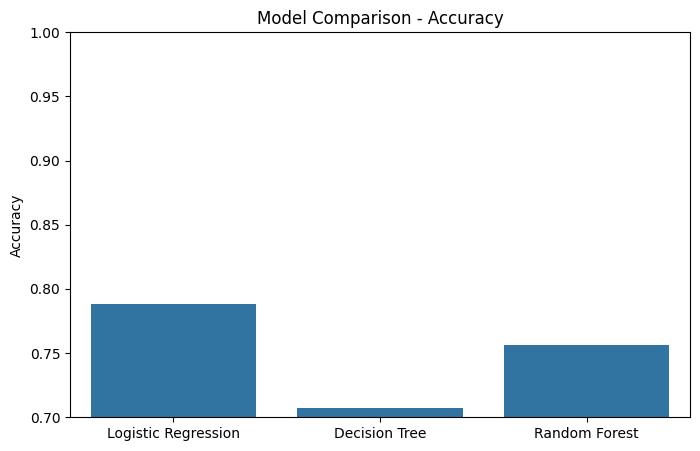

In [ ]:
# 7. Compare Model Accuracies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.show()

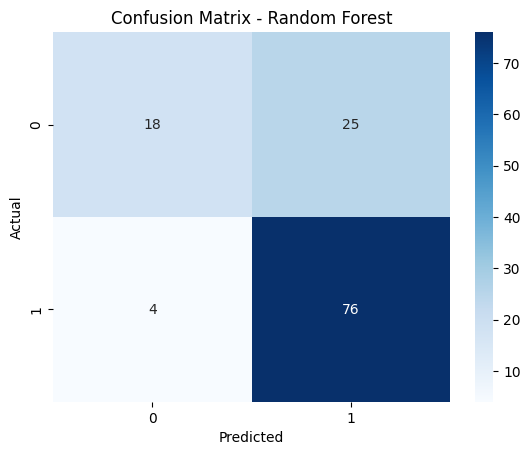

In [ ]:
# 8. Confusion Matrix for Best Model (Random Forest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()